# Scikit learn API

## Supervised learning

## Linear regression

preferred approach for predicting continuous labels

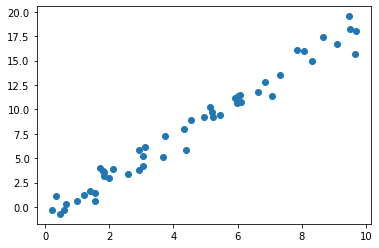

In [2]:
#set up some data
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x =  10 * rng.rand(50)
y = 2* x-1 +rng.randn(50)
plt.scatter(x,y);

In [3]:
# create a model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [4]:
# Create a features matrix
X = x[:, np.newaxis]
X.shape

(50, 1)

50 by 1 matrix

In [5]:
model.fit(X,y)

LinearRegression()

In [6]:
model.coef_

array([1.9776566])

In [8]:
model.intercept_

-0.903310725531111

In [10]:
# create some new unseen data
xfit =  np.linspace(-1,11)

# arrange into a feature matrix
Xfit = xfit[:, np.newaxis]

In [11]:
# predixt target array
yfit = model.predict(Xfit)

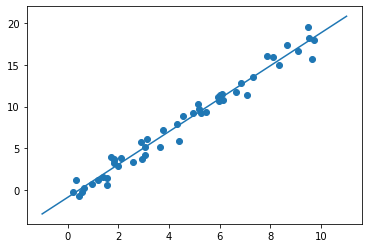

In [12]:
# Visualize the raw data and model fit
plt.scatter(x,y)
plt.plot(xfit,yfit);

In [13]:
rng.randn(50)

array([ 0.09707755,  0.96864499, -0.70205309, -0.32766215, -0.39210815,
       -1.46351495,  0.29612028,  0.26105527,  0.00511346, -0.23458713,
       -1.41537074, -0.42064532, -0.34271452, -0.80227727, -0.16128571,
        0.40405086,  1.8861859 ,  0.17457781,  0.25755039, -0.07444592,
       -1.91877122, -0.02651388,  0.06023021,  2.46324211, -0.19236096,
        0.30154734, -0.03471177, -1.16867804,  1.14282281,  0.75193303,
        0.79103195, -0.90938745,  1.40279431, -1.40185106,  0.58685709,
        2.19045563, -0.99053633, -0.56629773,  0.09965137, -0.50347565,
       -1.55066343,  0.06856297, -1.06230371,  0.47359243, -0.91942423,
        1.54993441, -0.78325329, -0.32206152,  0.81351722, -1.23086432])

# Iris classification

dimensionality reduction using principal components analysis

In [14]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\Xj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


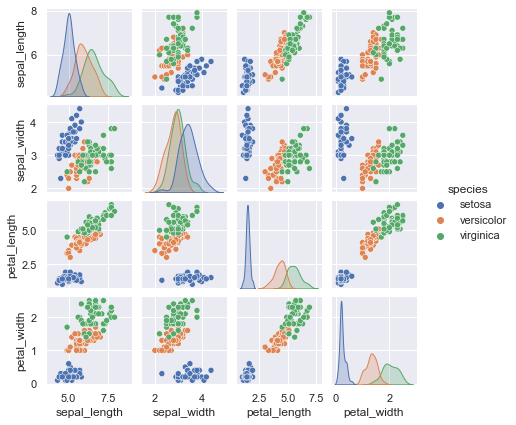

In [15]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [16]:
# extract the features matrix
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [17]:
# extract the target array
y_iris = iris['species']
y_iris.shape

(150,)

In [18]:
# split the data into training set and test set
from sklearn.model_selection import train_test_split
Xtrain, Xtest,ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [19]:
# create and train a model
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

It has no hyperparameters and relatively fast

In [21]:
# evaluate the model

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

## Unsupervised learning

## Dimensionality reduction

use principal component analysis, which is a fast linear dimensionality reduction technique. We will ask the model to return two components—that is, a two-dimensional representation of the data.

In [24]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters ie set the number of component/dimension to 2
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified! ie only look at the feature matrix not doing anything to target array
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions ie created a 2d matrix

visuallise the above by appending the two dimensions of our output to the data frame that we had earlier

C:\Users\Xj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


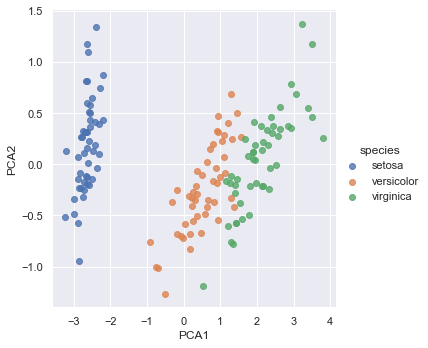

In [27]:
iris['PCA1'] = X_2D[:, 0] # append each column to iris data frame
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False); # colour from species, dont include regression line

# Iris clustering

A GMM attempts to model the data as a collection of Gaussian blobs. can be done by kmean/GMM

In [28]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628


In [30]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3, covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

C:\Users\Xj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


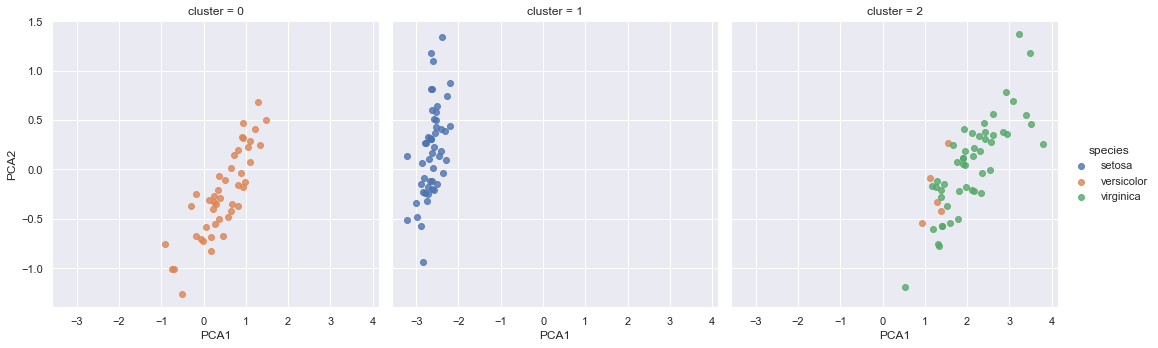

In [32]:
iris['cluster'] = y_gmm # appending to original df and then plot withseaborn
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);